<a href="https://colab.research.google.com/github/Kms2823/KSwitzer_ML/blob/main/KS_HW1_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall:

In [ ]:
import tensorflow as tf
from d2l import tensorflow as d2l

In [ ]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = tf.Variable(
            tf.random.normal((num_inputs, num_hiddens)) * sigma)
        self.b1 = tf.Variable(tf.zeros(num_hiddens))
        self.W2 = tf.Variable(
            tf.random.normal((num_hiddens, num_outputs)) * sigma)
        self.b2 = tf.Variable(tf.zeros(num_outputs))

In [ ]:
class MLPScratch_constant_initialization(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = tf.Variable(initial_value=tf.constant(1., dtype=tf.float32, shape=(num_inputs, num_hiddens)), trainable=True)
        self.b1 = tf.Variable(tf.zeros(num_hiddens))
        self.W2 = tf.Variable(initial_value=tf.constant(1., dtype=tf.float32, shape=(num_hiddens, num_outputs)), trainable=True)
        self.b2 = tf.Variable(tf.zeros(num_outputs))

In [ ]:
class MLPScratch_zero_initialization(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = tf.Variable(tf.zeros(shape=(num_inputs, num_hiddens)))
        self.b1 = tf.Variable(tf.zeros(num_hiddens))
        self.W2 = tf.Variable(tf.zeros(shape=(num_hiddens, num_outputs)))
        self.b2 = tf.Variable(tf.zeros(num_outputs))

In [ ]:
def relu(X):
    return tf.math.maximum(X, 0)

In [ ]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = tf.reshape(X, (-1, self.num_inputs))
    H = relu(tf.matmul(X, self.W1) + self.b1)
    return tf.matmul(H, self.W2) + self.b2

@d2l.add_to_class(MLPScratch_constant_initialization)
def forward(self, X):
    X = tf.reshape(X, (-1, self.num_inputs))
    H = relu(tf.matmul(X, self.W1) + self.b1)
    return tf.matmul(H, self.W2) + self.b2

@d2l.add_to_class(MLPScratch_zero_initialization)
def forward(self, X):
    X = tf.reshape(X, (-1, self.num_inputs))
    H = relu(tf.matmul(X, self.W1) + self.b1)
    return tf.matmul(H, self.W2) + self.b2

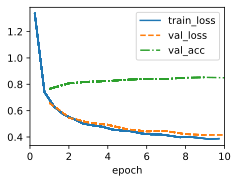

In [ ]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

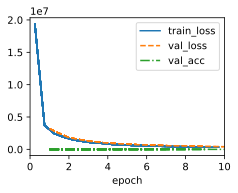

In [ ]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=1000):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = tf.Variable(
            tf.random.normal((num_inputs, num_hiddens)) * sigma)
        self.b1 = tf.Variable(tf.zeros(num_hiddens))
        self.W2 = tf.Variable(
            tf.random.normal((num_hiddens, num_outputs)) * sigma)
        self.b2 = tf.Variable(tf.zeros(num_outputs))

@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = tf.reshape(X, (-1, self.num_inputs))
    H = relu(tf.matmul(X, self.W1) + self.b1)
    return tf.matmul(H, self.W2) + self.b2

model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

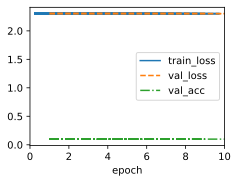

In [ ]:
model = MLPScratch_zero_initialization(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.001)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

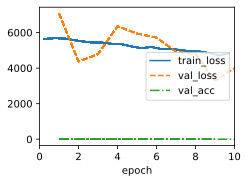

In [ ]:
model = MLPScratch_constant_initialization(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.001)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [ ]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation='relu'),
            tf.keras.layers.Dense(num_outputs)])

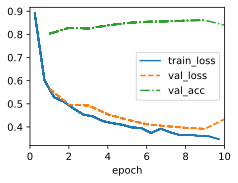

In [ ]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

In [ ]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, kernel_initializer='zeros',
    bias_initializer='zeros', activation='relu'),
            tf.keras.layers.Dense(num_outputs, kernel_initializer='zeros',
    bias_initializer='zeros')])

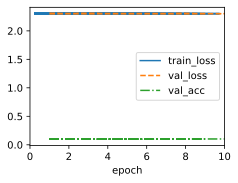

In [ ]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

In [16]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, kernel_initializer=tf.keras.initializers.Constant(1.),
    bias_initializer='zeros', activation='relu'),
            tf.keras.layers.Dense(num_outputs, kernel_initializer=tf.keras.initializers.Constant(1.),
    bias_initializer='zeros')])

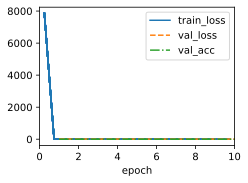

In [17]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)